Variables to be updated/configured:

In [1]:
FIGURES_DIR = 'figures' # path to directory where figures will the saved (creates the directory if it doesn't exist)
TABLES_DIR = "tables" # path to directory containing .csv files representing tables (creates the directory if it doesn't exist)
DAVID_MODULES_DIR = 'DAVID_modules' # path to directory where DAVID output is stored for the larget multiplex network
DAVID_MODULES_DIR_WES = 'DAVID_modules_wes' # path to directory where DAVID output is stored for the WES multiplex network

In [2]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
if not os.path.exists(TABLES_DIR):
    os.makedirs(TABLES_DIR)
if not os.path.exists(FIGURES_DIR):
    os.makedirs(FIGURES_DIR)

In [4]:
font = {'size'   : 18}
matplotlib.rc('font', **font)

# Generate top GO terms for each module

In [5]:
def get_top_go_terms(num_modules, input_dir):
    df = pd.DataFrame()
    for m in range(1, num_modules+1):
        # bp
        temp = pd.read_csv(os.path.join(input_dir, str(m)+"-"+"bp"), sep="\t")
        temp = temp.sort_values(by="FDR")

        bp_terms = []
        for i, row in temp.iterrows():
            if i == 10:
                break
            bp_terms.append(row["Term"] + "," + str(row["Count"]) + "," + str(row["FDR"]))

        # cc
        temp = pd.read_csv(os.path.join(input_dir, str(m)+"-"+"cc"), sep="\t")
        temp = temp.sort_values(by="FDR")

        cc_terms = []
        for i, row in temp.iterrows():
            if i == 10:
                break
            cc_terms.append(row["Term"] + "," + str(row["Count"]) + "," + str(row["FDR"]))

        # mf
        mf_terms = []
        try:
            temp = pd.read_csv(os.path.join(input_dir, str(m)+"-"+"mf"), sep="\t")
            temp = temp.sort_values(by="FDR")

            for i, row in temp.iterrows():
                if i == 10:
                    break
                mf_terms.append(row["Term"] + "," + str(row["Count"]) + "," + str(row["FDR"]))
        except:
            mf_terms.append('No GO terms found')

        temp_df = pd.DataFrame({"GO_terms_bp": ";".join(bp_terms), 
                             "GO_terms_mf": ";".join(mf_terms),
                             "GO_terms_cc": ";".join(cc_terms),
                            }, index=[m-1])
        df = df.append(temp_df)
    df['module'] = np.arange(1,num_modules+1)
    return df

In [6]:
df = get_top_go_terms(num_modules=13, input_dir=DAVID_MODULES_DIR_WES)
df.to_csv(os.path.join(TABLES_DIR, "DAVID_GO_terms_wes.csv"), index=False)

df = get_top_go_terms(num_modules=14, input_dir=DAVID_MODULES_DIR)
df.to_csv(os.path.join(TABLES_DIR, "DAVID_GO_terms.csv"), index=False)

# Generate top GO term figures for modules of interest

In [7]:
def plot_GO_term(GO_terms, pvals, counts, xlim, filename):
    print(filename)
    bar_width = 0.5
    labelsize = 12
    y_pos = np.arange(len(GO_terms))

    fig, ax1 = plt.subplots(figsize=(10,6))
    ax1.tick_params(axis='both', which='major', labelsize=labelsize)
    ax1.tick_params(axis='both', which='minor', labelsize=labelsize)
    bar1 = ax1.barh(y_pos, -np.log10(pvals), bar_width, align='center', color="lightblue", alpha=0.7)
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(GO_terms)
    ax1.invert_yaxis()  
    ax1.set_xlabel('-log10(FDR)')

    ax2 = ax1.twiny()
    ax2.tick_params(axis='both', which='major', labelsize=labelsize)
    ax2.tick_params(axis='both', which='minor', labelsize=labelsize)
    color = "purple"
    ax2.scatter(counts, y_pos, color=color)
    ax2.set_xlabel('Number of genes', color=color)
    ax2.tick_params(axis='x', labelcolor=color)
    
    if xlim:
        ax2.set_xlim(xlim)

    fig.tight_layout()

    plt.savefig(os.path.join(FIGURES_DIR, filename), dpi=600)
    plt.show()

mod_2_wes_GO.png


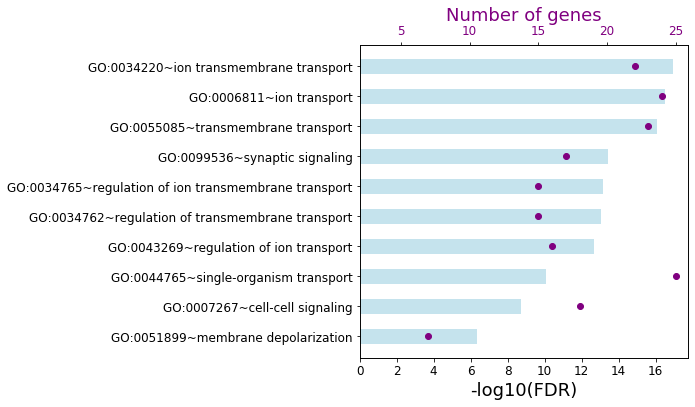

mod_7_wes_GO.png


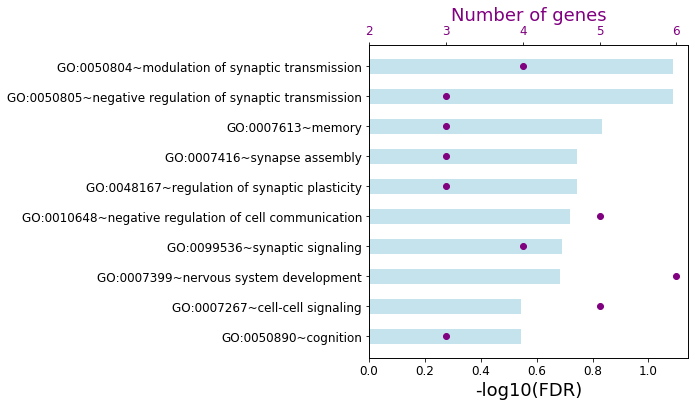

mod_3_GO.png


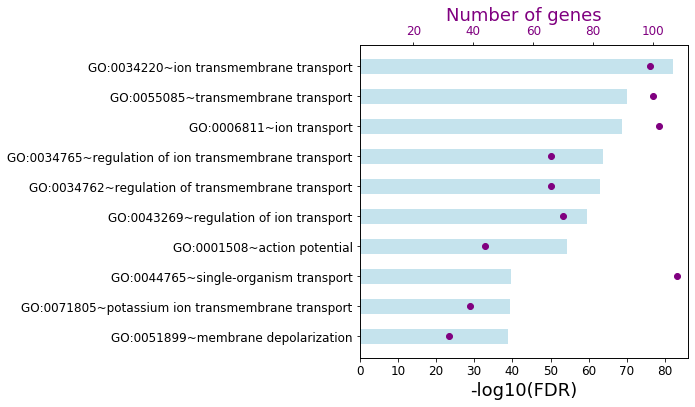

mod_6_GO.png


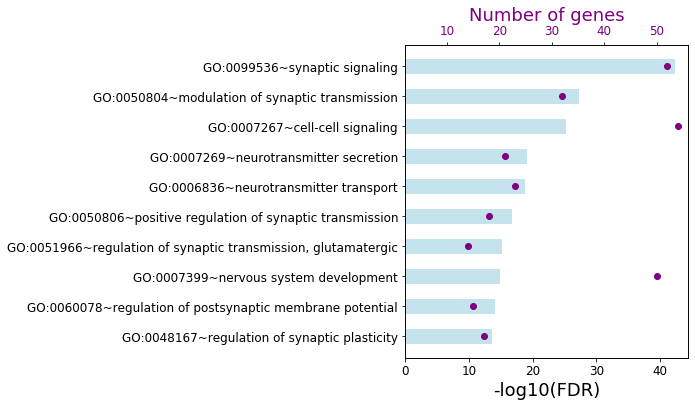

In [8]:
temp = pd.read_csv(os.path.join(DAVID_MODULES_DIR_WES, "2-bp"), sep="\t")
cutoff=10
plot_GO_term(list(temp["Term"])[:cutoff], list(temp['FDR'])[:cutoff], list(temp['Count'])[:cutoff], xlim=2, filename='mod_2_wes_GO.png')

temp = pd.read_csv(os.path.join(DAVID_MODULES_DIR_WES, "7-bp"), sep="\t")
plot_GO_term(list(temp["Term"])[:cutoff], list(temp['FDR'])[:cutoff], list(temp['Count'])[:cutoff], xlim=2, filename='mod_7_wes_GO.png')

temp = pd.read_csv(os.path.join(DAVID_MODULES_DIR, "3-bp"), sep="\t")
cutoff=10
plot_GO_term(list(temp["Term"])[:cutoff], list(temp['FDR'])[:cutoff], list(temp['Count'])[:cutoff], xlim=2, filename='mod_3_GO.png')

temp = pd.read_csv(os.path.join(DAVID_MODULES_DIR, "6-bp"), sep="\t")
plot_GO_term(list(temp["Term"])[:cutoff], list(temp['FDR'])[:cutoff], list(temp['Count'])[:cutoff], xlim=2, filename='mod_6_GO.png')
